# Projeto 1 - Fundamentos de Sistemas Inteligentes
Gabriel Henrique Souza de Melo
Link do repositório : https://github.com/gabriel-smello/projeto1-fsi

#### Pacotes e imports necessarios

In [2]:
pip install numpy sklearn scipy pandas matplotlib --upgrade

Requirement already up-to-date: numpy in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.21.5)
Requirement already up-to-date: sklearn in /home/gabriel/anaconda3/lib/python3.7/site-packages (0.0)
Requirement already up-to-date: scipy in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.7.3)
Requirement already up-to-date: pandas in /home/gabriel/anaconda3/lib/python3.7/site-packages (1.3.5)
Requirement already up-to-date: matplotlib in /home/gabriel/anaconda3/lib/python3.7/site-packages (3.5.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
scipy: 1.7.3
numpy: 1.21.5
matplotlib: 3.5.1
pandas: 1.3.5
sklearn: 0.22.1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

### Carregar dataset

In [5]:
dataset = pd.read_csv("../SA_heart.csv")


##### Transformando a classe 'famhist' em numerica

In [6]:
dataset = pd.get_dummies(dataset, columns=['famhist'], dtype='int', drop_first='True')
dataset = dataset.drop(columns=['id'])
dataset.head(10)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1
5,132,6.20,6.47,36.21,62,30.77,14.14,45,0,1
6,142,4.05,3.38,16.20,59,20.81,2.62,38,0,0
7,114,4.08,4.59,14.60,62,23.11,6.72,58,1,1
8,114,0.00,3.83,19.40,49,24.86,2.49,29,0,1
9,132,0.00,5.80,30.96,69,30.11,0.00,53,1,1


### Questão 1 - Análise estatística dos dados e plotagem das médias e desvios padrões de cada classe

##### Plotagem tipo 1

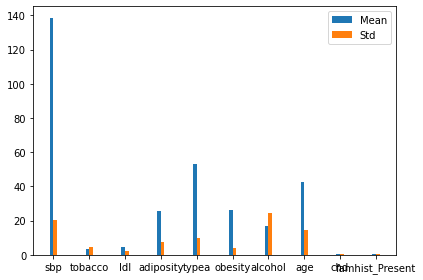

In [7]:
x = np.arange(10)

fig, ax = plot.subplots()
rects1 = ax.bar(x - 0.1/2, dataset.describe().loc['mean'],0.1, label='Mean')
rects2 = ax.bar(x + 0.1/2, dataset.describe().loc['std'], 0.1, label='Std')

ax.set_xticks(x, dataset.columns.values.tolist())
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
fig.tight_layout()

plot.show()



##### Plotagem tipo 2

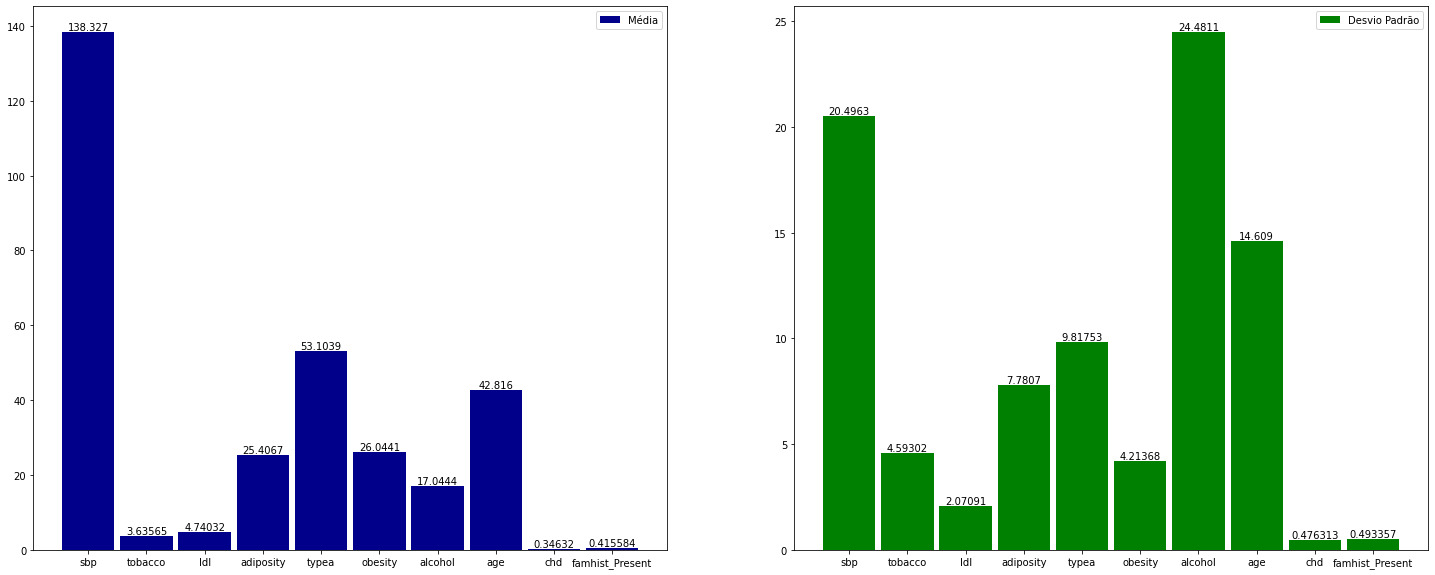

In [8]:
x = np.arange(10)
fig, (ax1,ax2) = plot.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(25)

rect1 = ax1.bar(x,dataset.describe().loc['mean'],0.9, label='Média', color = 'darkblue')
rect2 = ax2.bar(x,dataset.describe().loc['std'],0.9, label='Desvio Padrão', color = 'green')

ax1.set_xticks(x, dataset.columns.values.tolist())
ax2.set_xticks(x, dataset.columns.values.tolist())

ax1.legend()
ax2.legend()

ax1.bar_label(rect1)
ax2.bar_label(rect2)


plot.show()

### Questão 2 - Árvore de decisão e plotagem de curva AUC ROC e matriz de confusão

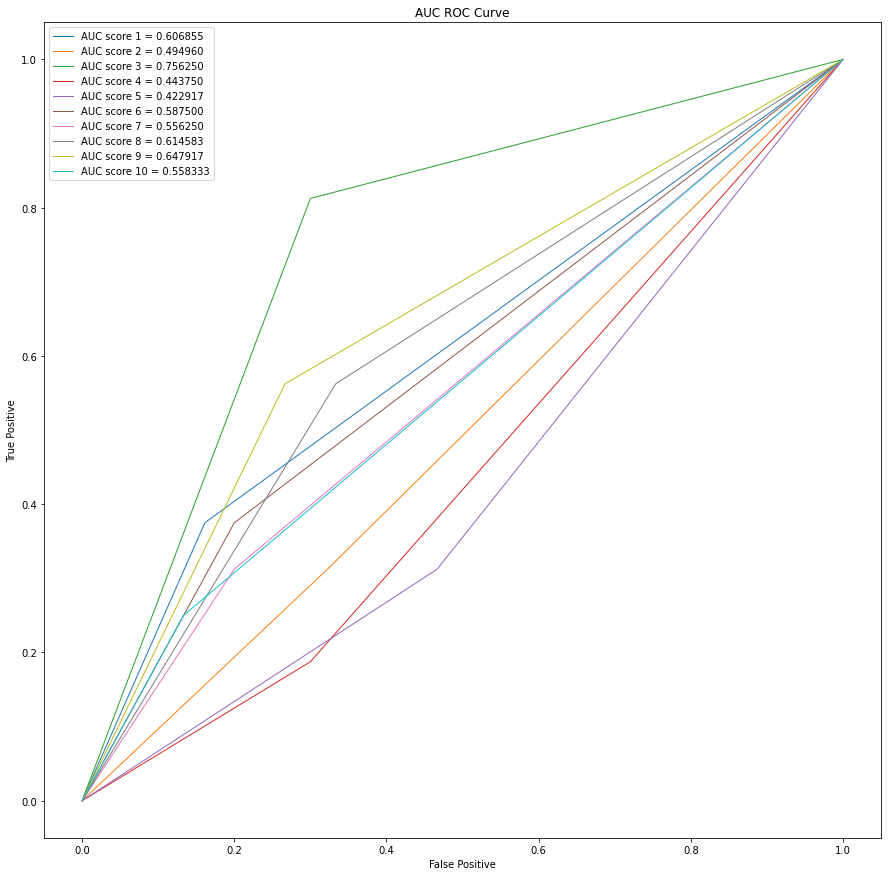

AUC Médio: 0.5689314516129033
AUC Desvio Padrão: 0.09377080958586152


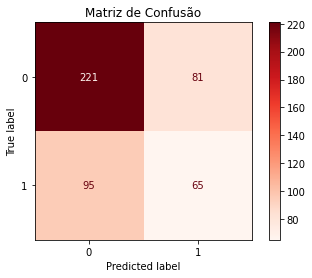

In [9]:
plot.figure(figsize=(15,15))

var_columns = [c for c in dataset.columns if c not in ['chd']]  # Nomes das colunas sem'chd'

X = dataset.loc[:, var_columns].values  # 9 primeiras variáveis
y = dataset.loc[:, 'chd']               # variavel 'chd' de classificação y

scores = []     # armazenara um score por avaliação
confusion = []  # armazenara dados para matriz de confusão

# Variável para validação cruzada e criação da árvore de decisão
folds = StratifiedKFold(n_splits=10)
dectree = DecisionTreeClassifier()

x = 1
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index] # Modo 1 (Usando KFold): comentar a linha seguinte
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)                     # Modo 2 (De forma aleatória): comentar a linha anterior
    dectree.fit(X_train, y_train)
    #ROC, AUC curve
    probs = dectree.predict_proba(X_test)
    probs = probs[:,1]

    dectree_auc = roc_auc_score(y_test, probs)

    scores.append(dectree_auc)

    fpr, tpr, _ = roc_curve(y_test, probs)

    # Matriz de Confusão
    prediction = dectree.predict(X_test)
    confusion.append(confusion_matrix(y_test, prediction))

    # Plotagem das legendas
    plot.plot(fpr, tpr, lw=1, label='AUC score %d = %f' % (x, dectree_auc))
    x += 1

# Plotagem das curvas e dados adicionais
plot.title("AUC ROC Curve")
plot.legend(loc="upper left")
plot.xlabel("False Positive")
plot.ylabel("True Positive")
plot.show()
auc_media1 = np.mean(scores)
auc_dp1 = np.std(scores)
print("AUC Médio: {}" .format(auc_media1))
print("AUC Desvio Padrão: {}" .format(auc_dp1))

# Plotagem da Matriz de confusão
reduced = np.add.reduce(confusion)

disp = ConfusionMatrixDisplay(reduced, [0,1])
disp.plot(cmap="Reds", values_format='')
plot.title("Matriz de Confusão")
plot.show()

### Questão 3 - Floresta randômica com 100 árvores e plotagens de curva AUC ROC e matriz de confusão

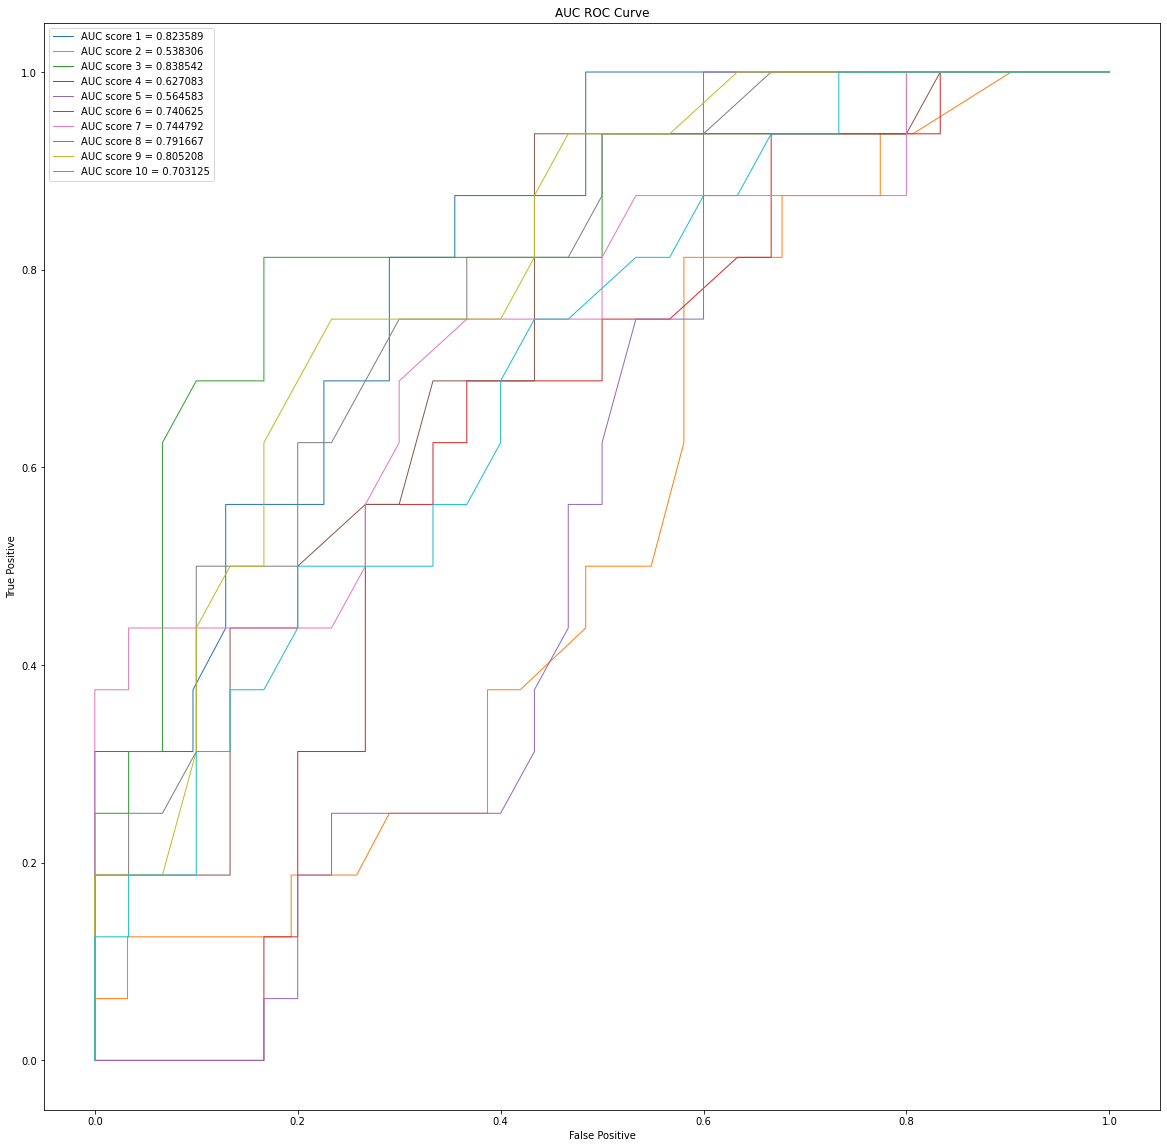

AUC Médio: 0.7177520161290323
AUC Desvio Padrão: 0.10210482853826532


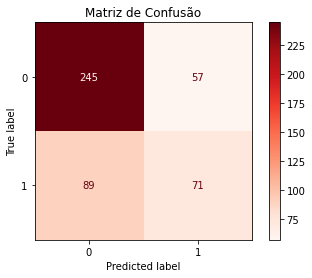

In [10]:
plot.figure(figsize=(20,20))

rf = RandomForestClassifier(n_estimators=100, max_features=None, random_state=999)

scores = []
confusion = []

x = 1
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index] # Modo 1 (Usando KFold): comentar a linha seguinte
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)                     # Modo 2 (De forma aleatória): comentar a linha anterior
    rf.fit(X_train, y_train)
    #ROC, AUC curve
    probs = rf.predict_proba(X_test)
    probs = probs[:,1]

    rf_auc = roc_auc_score(y_test, probs)
    scores.append(rf_auc)

    fpr, tpr, _ = roc_curve(y_test, probs)
    # Matriz de Confusão
    prediction = rf.predict(X_test)
    confusion.append(confusion_matrix(y_test, prediction))
    # Plotagem das legendas
    plot.plot(fpr, tpr, lw=1, label='AUC score %d = %f' % (x, rf_auc))
    x += 1

# Plotagem das curvas e dados adicionais
plot.title("AUC ROC Curve")
plot.legend(loc="upper left")
plot.xlabel("False Positive")
plot.ylabel("True Positive")
plot.show()
auc_media2 = np.mean(scores)
auc_dp2 = np.std(scores)
print("AUC Médio: {}" .format(auc_media2))
print("AUC Desvio Padrão: {}" .format(auc_dp2))

# Plotagem da Matriz de Confusão
reduced = np.add.reduce(confusion)

disp = ConfusionMatrixDisplay(reduced, [0,1])
disp.plot(cmap="Reds", values_format='')
plot.title("Matriz de Confusão")
plot.show()


A média aumentou em relação a árvore de decisão.

### Questão 4 - Floresta randômica com 100 árvores, usando a raiz quadrada das variáveis preditoras e plotagens de curva AUC ROC e matriz de confusão

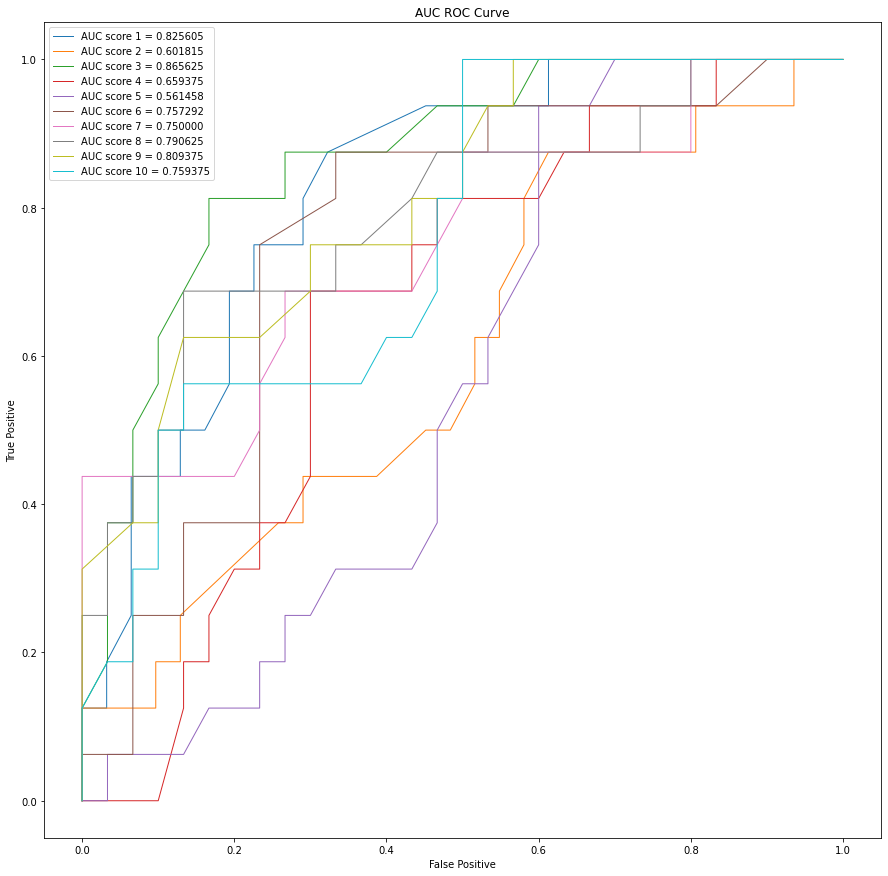

AUC Médio: 0.7380544354838711
AUC Desvio Padrão: 0.09417796756541383


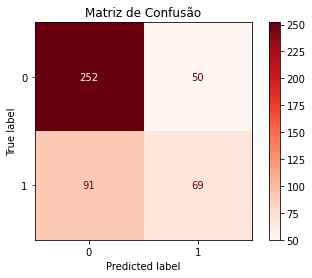

In [54]:
plot.figure(figsize=(15,15))

rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=999)

scores = []
confusion = []
melhor_caso = 0
importance = []

x = 1
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index] # Modo 1 (Usando KFold): comentar a linha seguinte
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)                     # Modo 2 (De forma aleatória): comentar a linha anterior
    rf.fit(X_train, y_train)
    #ROC, AUC curve
    probs = rf.predict_proba(X_test)
    probs = probs[:,1]

    rf_auc = roc_auc_score(y_test, probs)
    scores.append(rf_auc)

    fpr, tpr, _ = roc_curve(y_test, probs)
    # Matriz de Confusão
    prediction = rf.predict(X_test)
    confusion.append(confusion_matrix(y_test, prediction))
    # Plotagem das legendas
    plot.plot(fpr, tpr, lw=1, label='AUC score %d = %f' % (x, rf_auc))
    x += 1
    # Com o melhor caso é pego a importancia de cada variavel
    if rf_auc > melhor_caso:
        melhor_caso = rf_auc
        importance = rf.feature_importances_

# Plotagem das curvas e dados adicionais
plot.title("AUC ROC Curve")
plot.legend(loc="upper left")
plot.xlabel("False Positive")
plot.ylabel("True Positive")
plot.show()
auc_media3 = np.mean(scores)
auc_dp3 = np.std(scores)
print("AUC Médio: {}" .format(auc_media3))
print("AUC Desvio Padrão: {}" .format(auc_dp3))

# Plotagem da Matriz de Confusão
reduced = np.add.reduce(confusion)

disp1 = ConfusionMatrixDisplay(reduced, [0,1])
disp1.plot(cmap="Reds", values_format='')
plot.title("Matriz de Confusão")
plot.show()


Usando as raízes das variáveis a média obteve um ligeiro aumento e a matriz de confusão demonstra um aumento na taxa de acerto mesmo que seja pequena a diferença.

### Questão 5 - Mostrar quais as 2 variáveis preditoras mais importantes para o melhor resultado

##### Olhando para as médias das variáveis AUC e suas matrizes de confusão, o modelo de floresta randômica que utiliza as raízes quadradas das variáveis é o que obteve melhor resultado

In [52]:
if auc_media1 > auc_media2 and auc_media1 > auc_media3:
    print("Melhor caso: Árvore de decisão")
elif auc_media2 > auc_media1 and auc_media2 > auc_media3:
    print("Melhor caso: Floresta Randômica padrão")
elif auc_media3 > auc_media1 and auc_media3 > auc_media2:
    print("Melhor caso: Floresta Randômica com raíz")

Melhor caso: Floresta Randômica com raíz


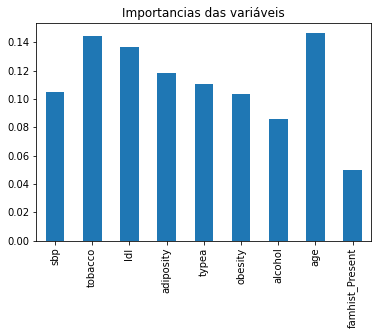

Variável de maior importancia: age
Segunda variável de maior importancia: tobacco


In [55]:
#Plotagem da importancia de cara variável
features = pd.Series(importance, index=dataset.drop(columns='chd').columns)
features.plot(kind='bar')
plot.title("Importancias das variáveis")
plot.show()

# Buscar as 2 variáveis de maior importancia
maior = max(importance[0], importance[1])
segmaior = min(importance[0], importance[1])
n = len(importance)
for i in range(2,n):
    if importance[i] > maior:
        segmaior = maior
        maior = importance[i]
    elif importance[i] > segmaior and maior != importance[i]:
        segmaior = importance[i]

index_maior = np.where(importance == maior)[0][0]
index_segmaior = np.where(importance == segmaior)[0][0]
var_maior = dataset.drop(columns='chd').columns[index_maior]
var_segmaior = dataset.drop(columns='chd').columns[index_segmaior]

print("Variável de maior importancia: {}\nSegunda variável de maior importancia: {}" .format(var_maior, var_segmaior))


#### Considerações finais

Com o uso de florestas randômicas e com o conjunto de dados fornecidos os resultados foram melhores que o modelo de árvore de decisão, principalmente quando se usa a raíz de cada várivel. Então podemos ver como a escolha de uma abordagem pode influenciar nos resultados de um estudo ou projeto que necessita deste tipo de manipulação de dados.

Depois, com a análise de variáveis, somos capazes de verificar a importância de cada variável para o resultado final. Neste caso as variáveis que mais influênciam na saída são a idade do paciente e o valor de tabaco. Lembrando que a saída nos informa se o paciente possui uma doença cardíaca coronária.